## Vehicle Detection Project

### Used lesson functions:
get_hog_features; extract_features; slide_window; draw_boxesl find_cars

In [1]:
import numpy as np
import pickle
import cv2
import glob
import time
from scipy.ndimage.measurements import label
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lesson_functions import *
%matplotlib inline

### Load and Visualize Training Data

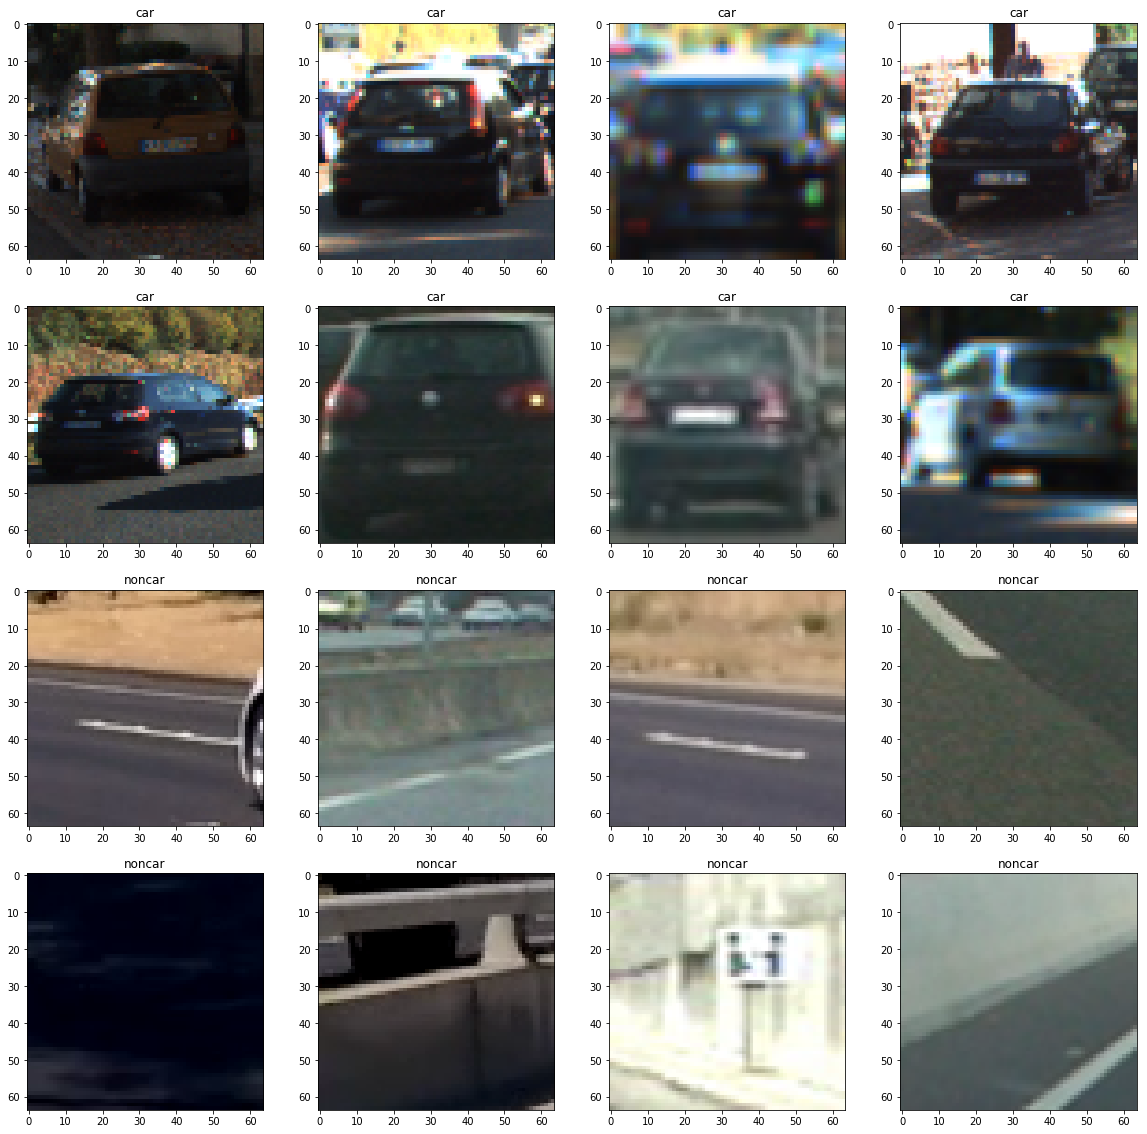

In [2]:
car_images = glob.glob('dataset/vehicles/**/*.png')
noncar_images = glob.glob('dataset/non-vehicles/**/*.png')
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
axs = axs.ravel()

for i in np.arange(8):
    img = cv2.imread(car_images[np.random.randint(0, len(car_images))])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].set_title('car')
    axs[i].imshow(img)
for i in np.arange(8, 16):
    img = cv2.imread(noncar_images[np.random.randint(0, len(noncar_images))])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].set_title('noncar')
    axs[i].imshow(img)

### Visualize HOG

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


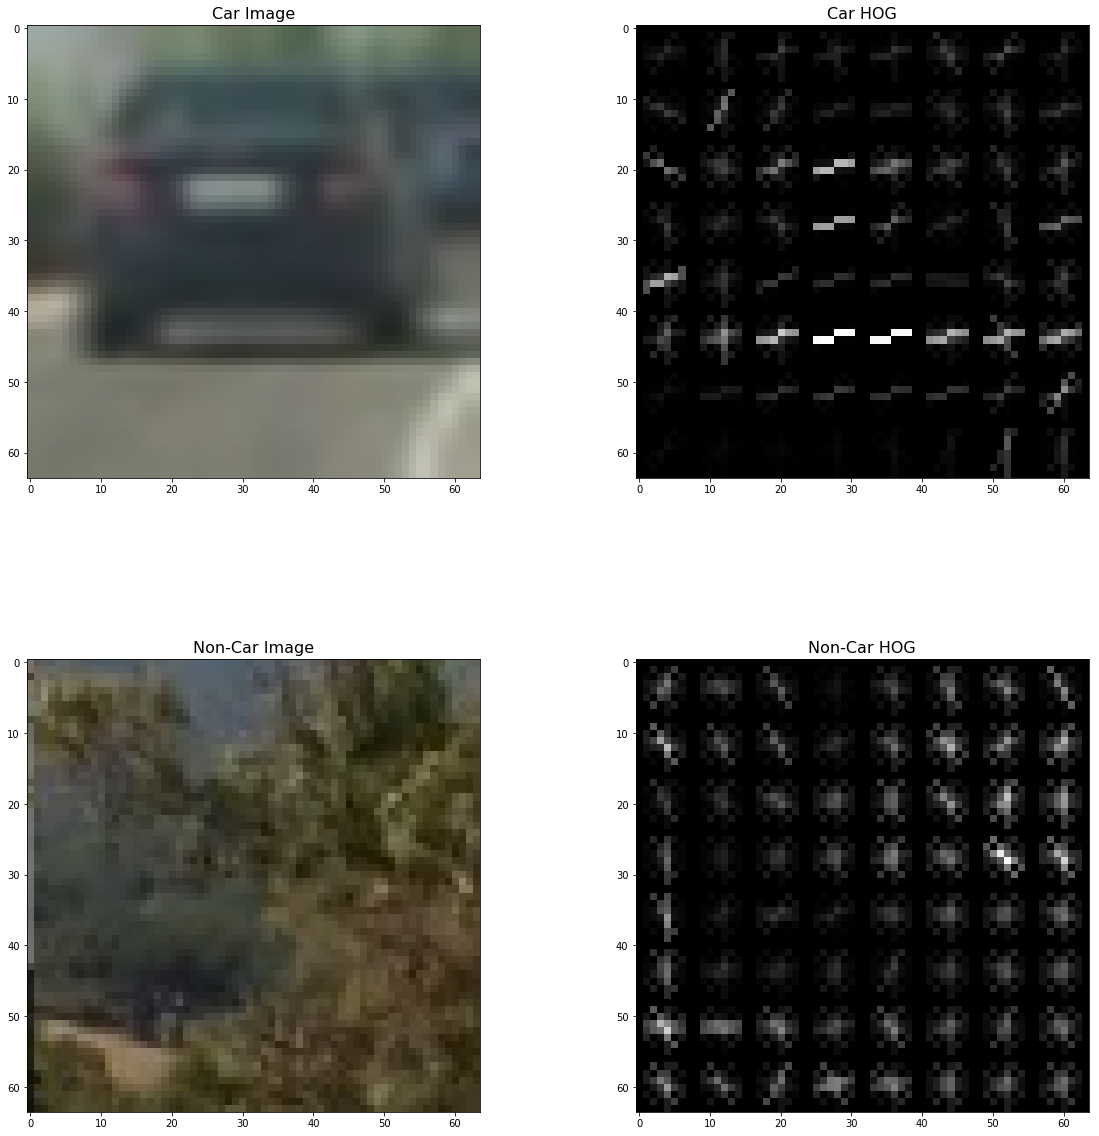

In [13]:
car_img = mpimg.imread(car_images[1])
_, car_dst = get_hog_features(car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)
noncar_img = mpimg.imread(noncar_images[1])
_, noncar_dst = get_hog_features(noncar_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

# Visualize 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=16)
ax2.imshow(car_dst, cmap='gray')
ax2.set_title('Car HOG', fontsize=16)
ax3.imshow(noncar_img)
ax3.set_title('Non-Car Image', fontsize=16)
ax4.imshow(noncar_dst, cmap='gray')
ax4.set_title('Non-Car HOG', fontsize=16)

### Explore features with different param combinations on example image

In [19]:
cars = car_images[:5]
notcars = noncar_images[:5]

color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

#used for exploration
color_spaces = ['HLS', 'RGB', 'HSV', 'YUV']
orients = [6, 9, 12]
pixs = [8, 12, 16]
cells = [2, 3]
channel = ['ALL', 0, 1, 2]

for color_space in color_spaces:
    for orient in orients:
        for pix_per_cell in pixs:
            for cell_per_block in cells:
                for hog_channel in channel:
                    t = time.time()
                    car_features = extract_features(cars,color_space=color_space,
                                            spatial_size=spatial_size, hist_bins=hist_bins, 
                                            orient=orient, pix_per_cell=pix_per_cell, 
                                            cell_per_block=cell_per_block, 
                                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                            hist_feat=hist_feat, hog_feat=hog_feat)
                    notcar_features = extract_features(notcars, color_space=color_space, 
                                            spatial_size=spatial_size, hist_bins=hist_bins, 
                                            orient=orient, pix_per_cell=pix_per_cell, 
                                            cell_per_block=cell_per_block, 
                                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                            hist_feat=hist_feat, hog_feat=hog_feat)
                    t2 = time.time()
                    print('color_space:', color_space, 'orient:', orient, 'pix_per_cell:', pix_per_cell, 
                         'cell_per_block:', cell_per_block, 'hog_channel:', hog_channel, 'times:', t2-t)
                    #print(round(t2-t, 2), 'Seconds to extract HOG features...')

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
else: 
    print('Your function only returns empty feature vectors...')

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 2 hog_channel: ALL times: 0.04761099815368652
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 2 hog_channel: 0 times: 0.01689004898071289
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 2 hog_channel: 1 times: 0.01717686653137207
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 2 hog_channel: 2 times: 0.018396854400634766
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 3 hog_channel: ALL times: 0.032109975814819336
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 3 hog_channel: 0 times: 0.015424013137817383
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 3 hog_channel: 1 times: 0.015012025833129883
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 3 hog_channel: 2 times: 0.018852949142456055
color_space: HLS orient: 6 pix_per_cell: 12 cell_per_block: 2 hog_channel: ALL times: 0.024630069732666016
color_space: HLS orient: 6 pix_per_cell: 12 cell_per_block: 

color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 2 hog_channel: ALL times: 0.022984981536865234
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 2 hog_channel: 0 times: 0.012444019317626953
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 2 hog_channel: 1 times: 0.011246919631958008
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 2 hog_channel: 2 times: 0.01363992691040039
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 3 hog_channel: ALL times: 0.025877952575683594
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 3 hog_channel: 0 times: 0.011846065521240234
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 3 hog_channel: 1 times: 0.011461019515991211
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 3 hog_channel: 2 times: 0.011246919631958008
color_space: RGB orient: 9 pix_per_cell: 8 cell_per_block: 2 hog_channel: ALL times: 0.04253816604614258
color_space: RGB orient: 9 pix_per_cell: 8 cell_per_

color_space: HSV orient: 9 pix_per_cell: 8 cell_per_block: 2 hog_channel: ALL times: 0.04470396041870117
color_space: HSV orient: 9 pix_per_cell: 8 cell_per_block: 2 hog_channel: 0 times: 0.018085956573486328
color_space: HSV orient: 9 pix_per_cell: 8 cell_per_block: 2 hog_channel: 1 times: 0.01869487762451172
color_space: HSV orient: 9 pix_per_cell: 8 cell_per_block: 2 hog_channel: 2 times: 0.019739866256713867
color_space: HSV orient: 9 pix_per_cell: 8 cell_per_block: 3 hog_channel: ALL times: 0.03910017013549805
color_space: HSV orient: 9 pix_per_cell: 8 cell_per_block: 3 hog_channel: 0 times: 0.01826190948486328
color_space: HSV orient: 9 pix_per_cell: 8 cell_per_block: 3 hog_channel: 1 times: 0.018398046493530273
color_space: HSV orient: 9 pix_per_cell: 8 cell_per_block: 3 hog_channel: 2 times: 0.01746511459350586
color_space: HSV orient: 9 pix_per_cell: 12 cell_per_block: 2 hog_channel: ALL times: 0.030096054077148438
color_space: HSV orient: 9 pix_per_cell: 12 cell_per_block: 2 

color_space: YUV orient: 9 pix_per_cell: 12 cell_per_block: 3 hog_channel: ALL times: 0.03328704833984375
color_space: YUV orient: 9 pix_per_cell: 12 cell_per_block: 3 hog_channel: 0 times: 0.016185998916625977
color_space: YUV orient: 9 pix_per_cell: 12 cell_per_block: 3 hog_channel: 1 times: 0.017405986785888672
color_space: YUV orient: 9 pix_per_cell: 12 cell_per_block: 3 hog_channel: 2 times: 0.01767587661743164
color_space: YUV orient: 9 pix_per_cell: 16 cell_per_block: 2 hog_channel: ALL times: 0.02937793731689453
color_space: YUV orient: 9 pix_per_cell: 16 cell_per_block: 2 hog_channel: 0 times: 0.013138055801391602
color_space: YUV orient: 9 pix_per_cell: 16 cell_per_block: 2 hog_channel: 1 times: 0.013461112976074219
color_space: YUV orient: 9 pix_per_cell: 16 cell_per_block: 2 hog_channel: 2 times: 0.01383209228515625
color_space: YUV orient: 9 pix_per_cell: 16 cell_per_block: 3 hog_channel: ALL times: 0.027266979217529297
color_space: YUV orient: 9 pix_per_cell: 16 cell_per_

### Test paramesters by trainng a classifier (With data random shuffle and split )

In [21]:
cars = car_images[:500]
notcars = noncar_images[:500]
# Define the labels vector



color_spaces = ['HLS', 'RGB', 'HSV', 'YUV']
orients = [6, 9, 12]
pixs = [8, 12, 16]
cells = [2, 3]
channel = ['ALL', 0, 1, 2]

for color_space in color_spaces:
    for orient in orients:
        for pix_per_cell in pixs:
            for cell_per_block in cells:
                for hog_channel in channel:
                    car_features = extract_features(cars,color_space=color_space,
                                            spatial_size=spatial_size, hist_bins=hist_bins, 
                                            orient=orient, pix_per_cell=pix_per_cell, 
                                            cell_per_block=cell_per_block, 
                                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                            hist_feat=hist_feat, hog_feat=hog_feat)
                    notcar_features = extract_features(notcars, color_space=color_space, 
                                            spatial_size=spatial_size, hist_bins=hist_bins, 
                                            orient=orient, pix_per_cell=pix_per_cell, 
                                            cell_per_block=cell_per_block, 
                                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                            hist_feat=hist_feat, hog_feat=hog_feat)
                    # Create an array stack of feature vectors
                    X = np.vstack((car_features, notcar_features)).astype(np.float64)
                    y = np.hstack((np.ones(500), np.zeros(500)))
                    # Split up data into randomized training and test sets
                    rand_state = np.random.randint(0, 100)
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
                    # Use a linear SVC 
                    svc = LinearSVC()
                    svc.fit(X_train, y_train)
                    score = round(svc.score(X_test, y_test), 4)
                    print('color_space:', color_space, 'orient:', orient, 'pix_per_cell:', pix_per_cell, 
                         'cell_per_block:', cell_per_block, 'hog_channel:', hog_channel, 'Accuracy:', score)
                    #print(round(t2-t, 2), 'Seconds to extract HOG features...')

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 2 hog_channel: ALL Accuracy: 0.995
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 2 hog_channel: 0 Accuracy: 0.925
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 2 hog_channel: 1 Accuracy: 1.0
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 2 hog_channel: 2 Accuracy: 0.925
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 3 hog_channel: ALL Accuracy: 1.0
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 3 hog_channel: 0 Accuracy: 0.91
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 3 hog_channel: 1 Accuracy: 0.98
color_space: HLS orient: 6 pix_per_cell: 8 cell_per_block: 3 hog_channel: 2 Accuracy: 0.905
color_space: HLS orient: 6 pix_per_cell: 12 cell_per_block: 2 hog_channel: ALL Accuracy: 1.0
color_space: HLS orient: 6 pix_per_cell: 12 cell_per_block: 2 hog_channel: 0 Accuracy: 0.91
color_space: HLS orient: 6 pix_per_cell: 12 cell_per_block: 2 hog_channel: 1 Accu

color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 2 hog_channel: 0 Accuracy: 0.995
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 2 hog_channel: 1 Accuracy: 0.985
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 2 hog_channel: 2 Accuracy: 0.99
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 3 hog_channel: ALL Accuracy: 0.965
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 3 hog_channel: 0 Accuracy: 0.96
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 3 hog_channel: 1 Accuracy: 0.985
color_space: RGB orient: 6 pix_per_cell: 16 cell_per_block: 3 hog_channel: 2 Accuracy: 0.96
color_space: RGB orient: 9 pix_per_cell: 8 cell_per_block: 2 hog_channel: ALL Accuracy: 0.995
color_space: RGB orient: 9 pix_per_cell: 8 cell_per_block: 2 hog_channel: 0 Accuracy: 1.0
color_space: RGB orient: 9 pix_per_cell: 8 cell_per_block: 2 hog_channel: 1 Accuracy: 0.995
color_space: RGB orient: 9 pix_per_cell: 8 cell_per_block: 2 hog_channel: 

color_space: HSV orient: 9 pix_per_cell: 12 cell_per_block: 2 hog_channel: 1 Accuracy: 0.915
color_space: HSV orient: 9 pix_per_cell: 12 cell_per_block: 2 hog_channel: 2 Accuracy: 0.99
color_space: HSV orient: 9 pix_per_cell: 12 cell_per_block: 3 hog_channel: ALL Accuracy: 1.0
color_space: HSV orient: 9 pix_per_cell: 12 cell_per_block: 3 hog_channel: 0 Accuracy: 0.865
color_space: HSV orient: 9 pix_per_cell: 12 cell_per_block: 3 hog_channel: 1 Accuracy: 0.91
color_space: HSV orient: 9 pix_per_cell: 12 cell_per_block: 3 hog_channel: 2 Accuracy: 0.98
color_space: HSV orient: 9 pix_per_cell: 16 cell_per_block: 2 hog_channel: ALL Accuracy: 1.0
color_space: HSV orient: 9 pix_per_cell: 16 cell_per_block: 2 hog_channel: 0 Accuracy: 0.93
color_space: HSV orient: 9 pix_per_cell: 16 cell_per_block: 2 hog_channel: 1 Accuracy: 0.92
color_space: HSV orient: 9 pix_per_cell: 16 cell_per_block: 2 hog_channel: 2 Accuracy: 1.0
color_space: HSV orient: 9 pix_per_cell: 16 cell_per_block: 3 hog_channel: AL

color_space: YUV orient: 12 pix_per_cell: 8 cell_per_block: 2 hog_channel: 2 Accuracy: 0.93
color_space: YUV orient: 12 pix_per_cell: 8 cell_per_block: 3 hog_channel: ALL Accuracy: 1.0
color_space: YUV orient: 12 pix_per_cell: 8 cell_per_block: 3 hog_channel: 0 Accuracy: 0.99
color_space: YUV orient: 12 pix_per_cell: 8 cell_per_block: 3 hog_channel: 1 Accuracy: 0.9
color_space: YUV orient: 12 pix_per_cell: 8 cell_per_block: 3 hog_channel: 2 Accuracy: 0.915
color_space: YUV orient: 12 pix_per_cell: 12 cell_per_block: 2 hog_channel: ALL Accuracy: 1.0
color_space: YUV orient: 12 pix_per_cell: 12 cell_per_block: 2 hog_channel: 0 Accuracy: 0.99
color_space: YUV orient: 12 pix_per_cell: 12 cell_per_block: 2 hog_channel: 1 Accuracy: 0.915
color_space: YUV orient: 12 pix_per_cell: 12 cell_per_block: 2 hog_channel: 2 Accuracy: 0.89
color_space: YUV orient: 12 pix_per_cell: 12 cell_per_block: 3 hog_channel: ALL Accuracy: 1.0
color_space: YUV orient: 12 pix_per_cell: 12 cell_per_block: 3 hog_chan

### Choose reasonable params to build a classifier

In [104]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 16
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins

t = time.time()
car_features = extract_features(car_images,color_space=color_space,
                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                orient=orient, pix_per_cell=pix_per_cell, 
                                cell_per_block=cell_per_block, 
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(noncar_images, color_space=color_space, 
                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                orient=orient, pix_per_cell=pix_per_cell, 
                                cell_per_block=cell_per_block, 
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)  

#Fit a per-column scaler - this will be necessary if combining different types of features (HOG + color_hist/bin_spatial)
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)
print(X_train)
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t = time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')


/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


55.29 Seconds to extract HOG features...
[[  2.58756135e+00   2.14663016e+00  -8.21041865e-02 ...,  -4.05291442e-01
    3.41113307e-01  -2.55840385e-01]
 [ -6.57512705e-01   4.45186494e-01  -8.07199581e-01 ...,  -1.51669181e-01
   -4.14947077e-01  -3.15083017e-01]
 [ -6.39450535e-01  -5.43203953e-01   1.91111100e-01 ...,  -2.36983404e-01
   -8.14463305e-02   4.65981952e-02]
 ..., 
 [  1.65422244e+00  -2.16144709e+00   2.07171015e+00 ...,   8.47872266e-01
   -3.51459450e-04   4.16826982e-01]
 [  1.15779439e+00   4.28048511e-01  -7.91834396e-01 ...,   6.94409909e-02
    1.45568068e+00   9.13699692e-01]
 [ -2.18590110e-02   2.96931020e-01  -2.98754185e-02 ...,   4.83768226e-01
    2.36225254e+00   1.00757889e+00]]
3.45 Seconds to train SVC...
Test Accuracy of SVC =  0.9885
My SVC predicts:  [ 1.  0.  1.  0.  0.  1.  0.  0.  1.  1.]
For these 10 labels:  [ 1.  0.  1.  0.  0.  1.  0.  0.  1.  1.]
0.00195 Seconds to predict 10 labels with SVC


### Using sliding window method to find cars

In [160]:
def find_car(img, ystart, ystop, scale, cspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, test=False):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    rectangles = []
    img_tosearch = img[ystart:ystop,:,:]
    # apply color conversion if other than 'RGB'
    if cspace != 'RGB':
        if cspace == 'HSV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HSV)
        elif cspace == 'LUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2LUV)
        elif cspace == 'HLS':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HLS)
        elif cspace == 'YUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YUV)
        elif cspace == 'YCrCb':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
    else: ctrans_tosearch = np.copy(image)
        
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            #test_prediction = svc.predict(hog_features)
            
            if test_prediction == 1 or test == True:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                #cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                rectangles.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return rectangles

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


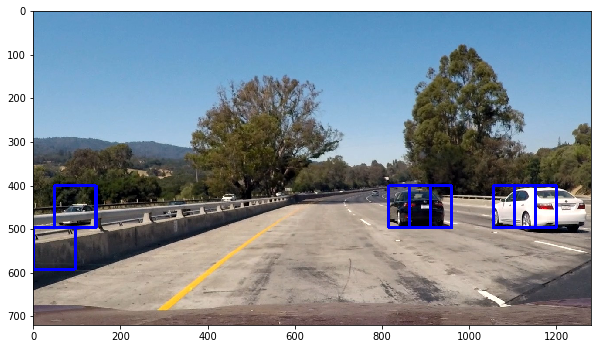

In [161]:
test_img = mpimg.imread('./test_images/test1.jpg')

ystart = 400
ystop = 656
scale = 1.5
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb

hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

#rectangles = find_cars(test_img, ystart, ystop, scale, svc, None, orient, pix_per_cell, cell_per_block, None, None)
bboxs = find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
test_img = draw_boxes(test_img, bboxs)
plt.figure(figsize=(10, 10))
plt.imshow(test_img)


### Explore Area

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


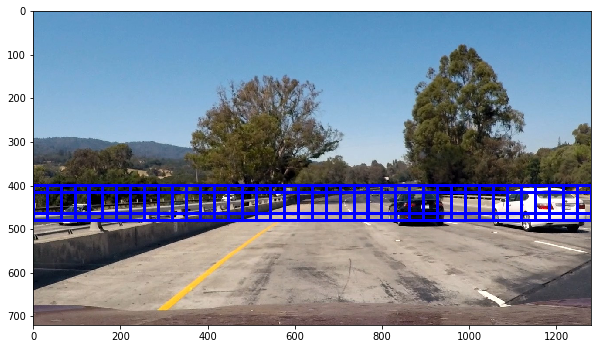

In [162]:
test_img = mpimg.imread('./test_images/test1.jpg')
rectangles = []
ystart = 400
ystop = 464
scale = 1.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, test = True))

ystart = 416
ystop = 480
scale = 1.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, test = True))

rectangles = [item for bboxs in rectangles for item in bboxs] 
test_img = draw_boxes(test_img, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(test_img)

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


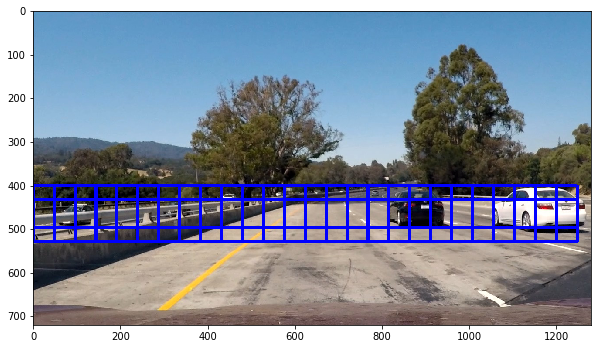

In [163]:
test_img = mpimg.imread('./test_images/test1.jpg')
rectangles = []
ystart = 400
ystop = 496
scale = 1.5
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, test = True))

ystart = 432
ystop = 528
scale = 1.5
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, test = True))

rectangles = [item for bboxs in rectangles for item in bboxs] 
test_img = draw_boxes(test_img, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(test_img)

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


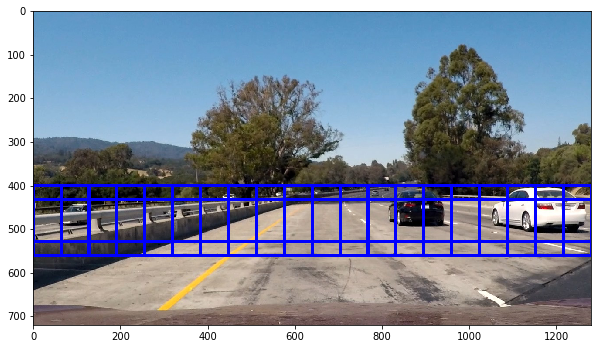

In [164]:
test_img = mpimg.imread('./test_images/test1.jpg')
rectangles = []
ystart = 400
ystop = 528
scale = 2.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, test = True))

ystart = 432
ystop = 560
scale = 2.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, test = True))

rectangles = [item for bboxs in rectangles for item in bboxs] 
test_img = draw_boxes(test_img, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(test_img)

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


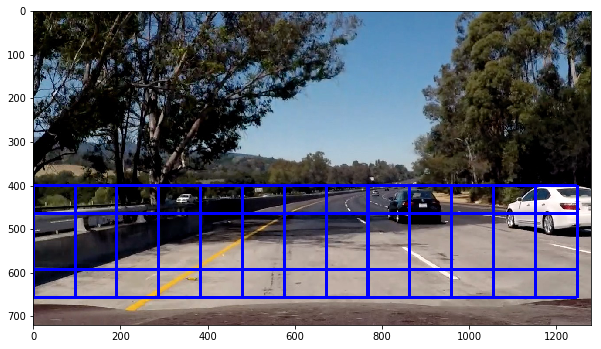

In [169]:
test_img = mpimg.imread('./test_images/test5.jpg')
rectangles = []
ystart = 400
ystop = 592
scale = 3.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, test = True))

ystart = 464
ystop = 660
scale = 3.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, test = True))

rectangles = [item for bboxs in rectangles for item in bboxs] 
test_img = draw_boxes(test_img, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(test_img)

### Combine different size of boxes and draw on test image

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


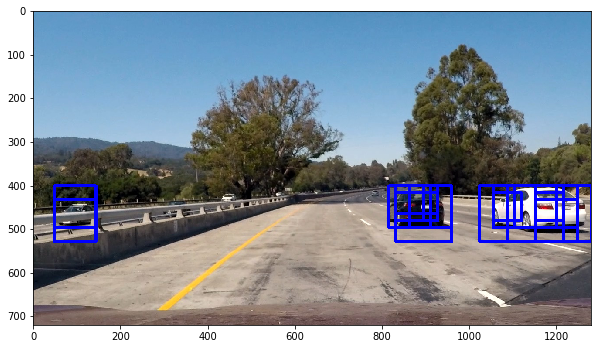

In [170]:
test_img = mpimg.imread('./test_images/test1.jpg')

ystart = 400
ystop = 656
scale = 1.5
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 16
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

rectangles = []
ystart = 400
ystop = 464
scale = 1.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 416
ystop = 480
scale = 1.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 400
ystop = 496
scale = 1.5
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 432
ystop = 528
scale = 1.5
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 400
ystop = 528
scale = 2.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 432
ystop = 560
scale = 2.0
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 400
ystop = 596
scale = 3.5
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

ystart = 464
ystop = 660
scale = 3.5
rectangles.append(find_car(test_img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

rectangles = [item for bboxs in rectangles for item in bboxs] 
test_img = draw_boxes(test_img, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(test_img)




### Use Heatmap

In [171]:
def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    return heatmap

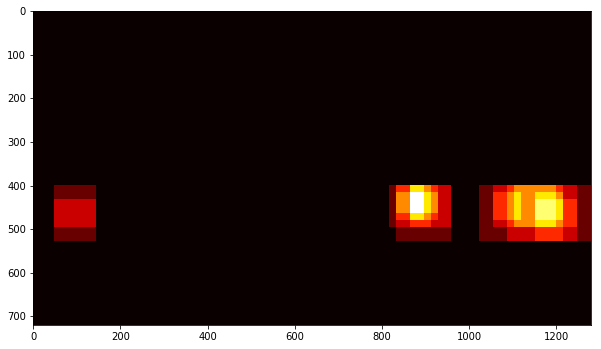

In [172]:
test_img = mpimg.imread('./test_images/test1.jpg')
heatmap_img = np.zeros_like(test_img[:,:,0])
heatmap_img = add_heat(heatmap_img, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(heatmap_img, cmap='hot')

### Use threshold on heatmap

In [173]:
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

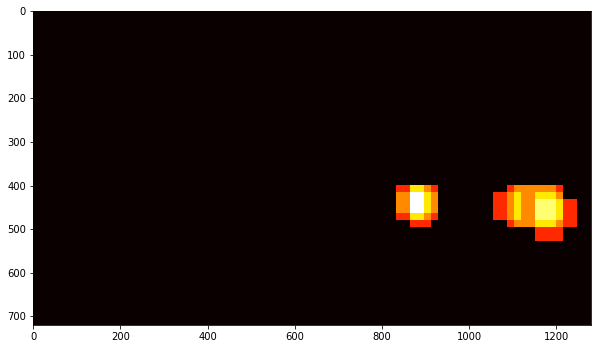

In [174]:
heatmap_img = apply_threshold(heatmap_img, 2)
plt.figure(figsize=(10,10))
plt.imshow(heatmap_img, cmap='hot')

### Use labels on heatmap

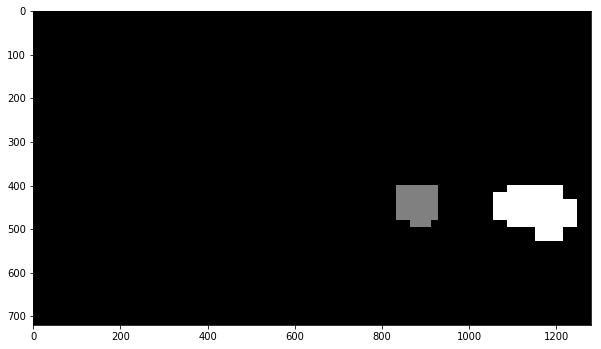

In [175]:
labels = label(heatmap_img)
plt.figure(figsize=(10,10))
plt.imshow(labels[0], cmap='gray')

### Drow boxes of labels on image

In [176]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

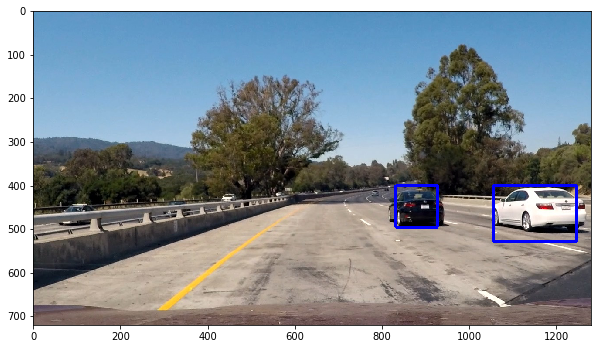

In [177]:
# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(test_img), labels)
# Display the image
plt.figure(figsize=(10,10))
plt.imshow(draw_img)

### Form a pipeline for one frame

In [188]:
def pipeline(img):
    ystart = 400
    ystop = 656
    colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 12
    pix_per_cell = 16
    cell_per_block = 2
    hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

    rectangles = []
    ystart = 400
    ystop = 464
    scale = 1.0
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 416
    ystop = 480
    scale = 1.0
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    ystart = 400
    ystop = 496
    scale = 1.5
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 432
    ystop = 528
    scale = 1.5
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    ystart = 400
    ystop = 528
    scale = 2.0
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    ystart = 432
    ystop = 560
    scale = 2.0
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 400
    ystop = 596
    scale = 3.5
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    ystart = 464
    ystop = 660
    scale = 3.5
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    
    rectangles = [item for bboxs in rectangles for item in bboxs]
    
    heatmap_img = np.zeros_like(img[:,:,0])
    heatmap_img = add_heat(heatmap_img, rectangles)
    heatmap_img = apply_threshold(heatmap_img, 2)
    labels = label(heatmap_img)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    return draw_img
    

/Users/fengxinyu/miniconda3/envs/CarND1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


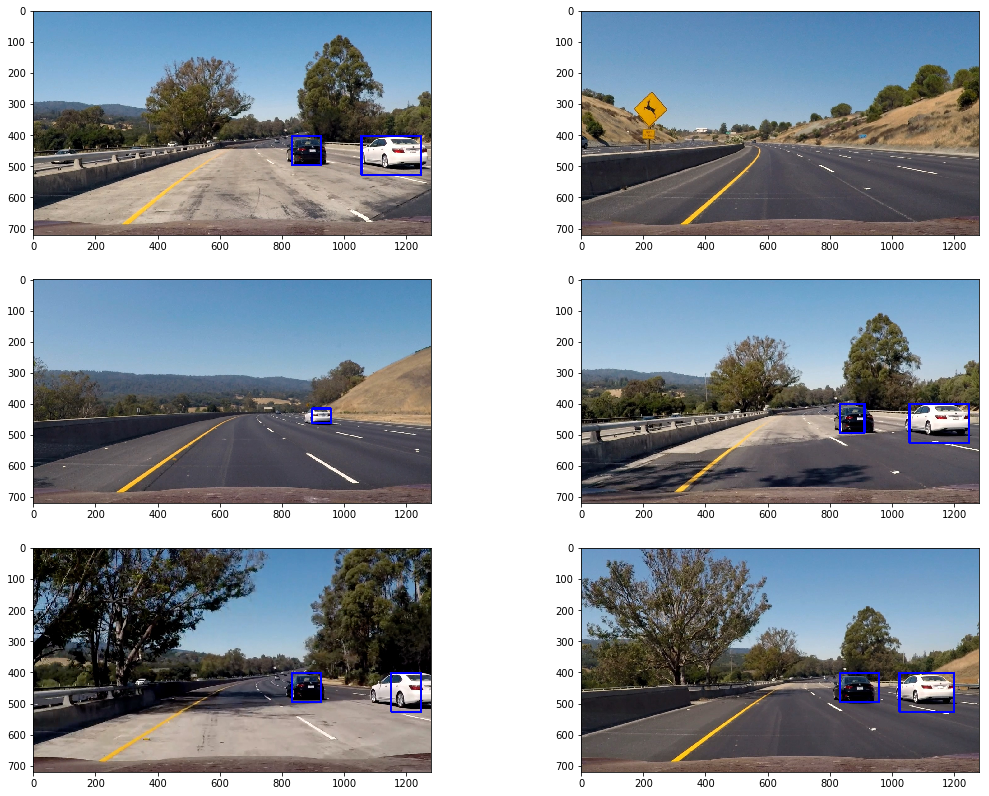

In [156]:
test_images = glob.glob('./test_images/test*.jpg')

fig, axs = plt.subplots(3, 2, figsize=(18,14))
axs = axs.ravel()

for i, im in enumerate(test_images):
    draw_img = pipeline(mpimg.imread(im))
    axs[i].imshow(draw_img)

### Test Video

In [189]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
test_out_file = 'test_video_out.mp4'
clip_test = VideoFileClip('test_video.mp4')
clip_test_out = clip_test.fl_image(pipeline)
%time clip_test_out.write_videofile(test_out_file, audio=False)

[MoviePy] >>>> Building video test_video_out.mp4
[MoviePy] Writing video test_video_out.mp4



 97%|█████████▋| 38/39 [00:11<00:00,  3.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_out.mp4 

CPU times: user 11.4 s, sys: 1.33 s, total: 12.7 s
Wall time: 12.5 s


### A class to store previous car detection information

In [194]:
class Vehicle_Detect():
    def __init__(self):
        # history of rectangles previous n frames
        self.prev_rects = [] 
        
    def add_rects(self, rects):
        self.prev_rects.append(rects)
        if len(self.prev_rects) > 15:
            # throw out oldest rectangle set(s)
            self.prev_rects = self.prev_rects[len(self.prev_rects)-15:]

In [190]:
def get_rectangles(img):
    ystart = 400
    ystop = 656
    colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 12
    pix_per_cell = 16
    cell_per_block = 2
    hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

    rectangles = []
    ystart = 400
    ystop = 464
    scale = 1.0
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 416
    ystop = 480
    scale = 1.0
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    ystart = 400
    ystop = 496
    scale = 1.5
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 432
    ystop = 528
    scale = 1.5
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    ystart = 400
    ystop = 528
    scale = 2.0
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    ystart = 432
    ystop = 560
    scale = 2.0
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    ystart = 400
    ystop = 596
    scale = 3.5
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    ystart = 464
    ystop = 660
    scale = 3.5
    rectangles.append(find_car(img, ystart, ystop, scale, colorspace, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    
    rectangles = [item for bboxs in rectangles for item in bboxs]
    return rectangles

In [203]:
def advanced_pipeline(img):
    rectangles = get_rectangles(img)
    if len(rectangles) > 0:
        det.add_rects(rectangles)
    
    heatmap_img = np.zeros_like(img[:,:,0])
    for rect_set in det.prev_rects:
        heatmap_img = add_heat(heatmap_img, rect_set)
    heatmap_img = apply_threshold(heatmap_img, 1 + len(det.prev_rects))
     
    labels = label(heatmap_img)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    return draw_img

In [205]:
det = Vehicle_Detect()

test_out_file2 = 'project_video_out.mp4'
clip_test2 = VideoFileClip('project_video.mp4')
clip_test_out2 = clip_test2.fl_image(advanced_pipeline)
%time clip_test_out2.write_videofile(test_out_file2, audio=False)

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


100%|█████████▉| 1260/1261 [06:20<00:00,  3.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out.mp4 

CPU times: user 6min 6s, sys: 41 s, total: 6min 47s
Wall time: 6min 20s
